# Parabolic Exercises

As an example for a parabolic partial differential equations consider the convection-diffusion-reaction equation.
\begin{align*}
    \partial_t c = \text{div} (\kappa_c \nabla c - cq) + r(c)
\end{align*}
For instance think about a bacterial colony with initial concentration $$ c(0,x) = c_0(x) $$ and a linearized reaction term $$ r(c) = Rc $$


In [1]:
import sys
sys.path.append('../..')

from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import ipywidgets as widgets
import python.mppy as mppy
from plotting import *
import pandas as pd

mpp = mppy.Mpp(kernels=4,
               mute=False,
               executable='M++',
               project_name='tutorial',
               cmake_args = ['-DBUILD_TUTORIAL=ON'])

mpp.clean_data()
mpp.build()


================ running cmake ================

-- PROJECT_BINARY_DIR= /home/ardar/mpp/build
-- PROJECT_SOURCE_DIR= /home/ardar/mpp
-- PROJECT_MPP_DIR=    /home/ardar/mpp
-- Option:     BUILD_UQ= OFF   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppRelease   (using cached value)
-- Option:     DEBUG_LEVEL= 1   (using cached value)
-- Option:     CPP_VERSION= 20   (using cached value)
-- Option:     CMAKE_CXX_STANDARD=    (using cached value)
-- Option:     CPP_COMPILER_TYPE= c++   (using cached value)
-- Option:     SUPPRESS_WARNINGS= OFF   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     CONST_GEOMETRIC_TOLERANCE= 1e-10   (using cached value)
-- Option:     CONST_NEAR_ZERO= 1e-15   (using cached value)
-- Option:     CONST_VERY_LARGE= 1e30   (using cached value)
-- Option:     CONST_INFTY= 1e100   (using cached value)
-- Option:     SPACE_DIM= 3   (using cached value)
-- Option:     USE_SPACETIME= OFF   (using cached value)
-- Option

0

In [2]:
mpp.run(4, config="TUT_reaction")


================ running  mpp ================

start program on 4 procs at Sun Mar 24 15:20:38 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 1
     delta: ................................... 0.0
     Diffusion: ............................... 0.01
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearVerbose: ........................... 0
     MeshVerbose: ..................

0

In [3]:
import os
sorted(os.listdir(mpp.dm.PROJECT_VTU_DATA_DIR))

['C.0',
 'C.0.pvtu',
 'C.1',
 'C.1.pvtu',
 'C.10',
 'C.10.pvtu',
 'C.11',
 'C.11.pvtu',
 'C.12',
 'C.12.pvtu',
 'C.13',
 'C.13.pvtu',
 'C.14',
 'C.14.pvtu',
 'C.15',
 'C.15.pvtu',
 'C.16',
 'C.16.pvtu',
 'C.17',
 'C.17.pvtu',
 'C.18',
 'C.18.pvtu',
 'C.19',
 'C.19.pvtu',
 'C.2',
 'C.2.pvtu',
 'C.20',
 'C.20.pvtu',
 'C.21',
 'C.21.pvtu',
 'C.22',
 'C.22.pvtu',
 'C.23',
 'C.23.pvtu',
 'C.24',
 'C.24.pvtu',
 'C.25',
 'C.25.pvtu',
 'C.26',
 'C.26.pvtu',
 'C.27',
 'C.27.pvtu',
 'C.28',
 'C.28.pvtu',
 'C.29',
 'C.29.pvtu',
 'C.3',
 'C.3.pvtu',
 'C.30',
 'C.30.pvtu',
 'C.31',
 'C.31.pvtu',
 'C.32',
 'C.32.pvtu',
 'C.33',
 'C.33.pvtu',
 'C.34',
 'C.34.pvtu',
 'C.35',
 'C.35.pvtu',
 'C.36',
 'C.36.pvtu',
 'C.37',
 'C.37.pvtu',
 'C.38',
 'C.38.pvtu',
 'C.39',
 'C.39.pvtu',
 'C.4',
 'C.4.pvtu',
 'C.40',
 'C.40.pvtu',
 'C.41',
 'C.41.pvtu',
 'C.42',
 'C.42.pvtu',
 'C.43',
 'C.43.pvtu',
 'C.44',
 'C.44.pvtu',
 'C.45',
 'C.45.pvtu',
 'C.46',
 'C.46.pvtu',
 'C.47',
 'C.47.pvtu',
 'C.48',
 'C.48.pvtu'

In [4]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0,vmax=1.0)

interactive(children=(IntSlider(value=0, description='n', max=80), Output()), _dom_classes=('widget-interact',…

Text(0, 0.5, 'Mass')

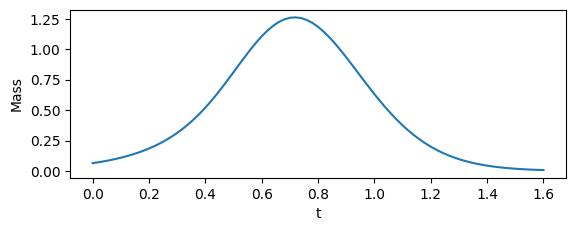

In [5]:
mpp.reset_data()
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

# Todo Outflow plots

### 1. Different reaction rates

In [6]:
kwargs = {"Reaction": -2.5}
mpp.run(4, config="TUT_reaction", kwargs=kwargs)


================ running  mpp ================

start program on 4 procs at Sun Mar 24 15:20:43 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 1
     delta: ................................... 0.0
     Diffusion: ............................... 0.01
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearVerbose: ........................... 0
     MeshVerbose: ..................

0

In [7]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0,vmax=1.0)

interactive(children=(IntSlider(value=0, description='n', max=80), Output()), _dom_classes=('widget-interact',…

Text(0, 0.5, 'Mass')

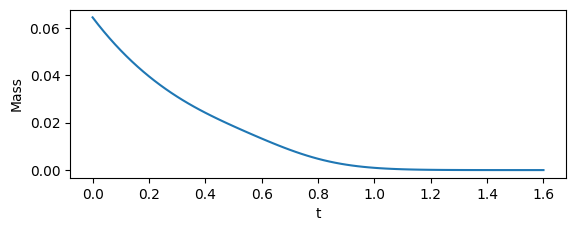

In [8]:
mpp.reset_data()
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

# Todo Outflow plots

In [9]:
kwargs = {"Reaction": 2.5}
mpp.run(4, config="TUT_reaction", kwargs=kwargs)


================ running  mpp ================

start program on 4 procs at Sun Mar 24 15:20:46 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 1
     delta: ................................... 0.0
     Diffusion: ............................... 0.01
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearVerbose: ........................... 0
     MeshVerbose: ..................

0

In [10]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0,vmax=1.0)

interactive(children=(IntSlider(value=0, description='n', max=80), Output()), _dom_classes=('widget-interact',…

Text(0, 0.5, 'Mass')

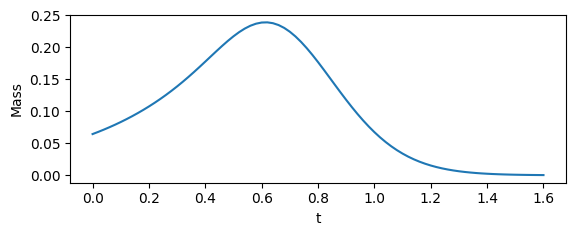

In [11]:
mpp.reset_data()
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

# Todo Outflow plots

### 2. Oszillations in convection dominant cases:

In [12]:
kwargs = {"Diffusion": 0.00001}
mpp.run(4, config="TUT_reaction", kwargs=kwargs)


================ running  mpp ================

start program on 4 procs at Sun Mar 24 15:20:49 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 1
     delta: ................................... 0.0
     Diffusion: ............................... 1e-05
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearVerbose: ........................... 0
     MeshVerbose: .................

0

In [13]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0.0,vmax=1.0)

interactive(children=(IntSlider(value=0, description='n', max=80), Output()), _dom_classes=('widget-interact',…

Text(0, 0.5, 'Mass')

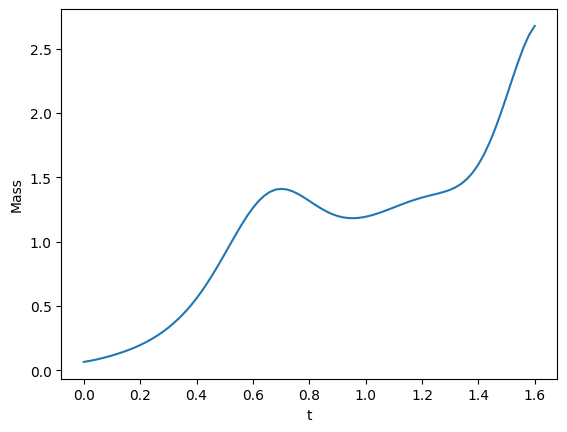

In [14]:
mpp.reset_data()
mpp.parse_json()

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

### 3. Higher order Ansatzelements 

In [15]:
kwargskdr = {"degree": 2,
             "Diffusion": 0.00001}
mpp.run(4, config="TUT_reaction", kwargs=kwargskdr)


================ running  mpp ================

start program on 4 procs at Sun Mar 24 15:20:54 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 2
     delta: ................................... 0.0
     Diffusion: ............................... 1e-05
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearVerbose: ........................... 0
     MeshVerbose: .................

0

In [16]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0.0,vmax=1.0)

interactive(children=(IntSlider(value=0, description='n', max=80), Output()), _dom_classes=('widget-interact',…

Text(0, 0.5, 'Mass')

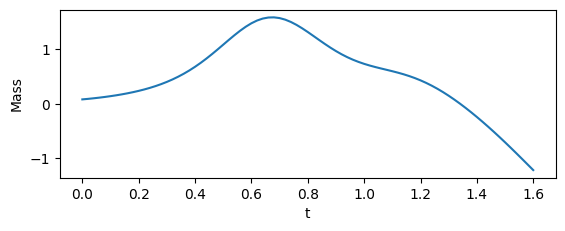

In [17]:
mpp.reset_data()
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

In [18]:
# Todo finish Exercise 13